In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv(r"C:\Users\asus\Desktop\Elderly_Wearable_Tech\Data Science\Alzeimer's Prediction\Alzheimer's dataset.csv")

In [2]:
# Check for null values in each column
null_values = dataset.isnull().sum()

# Determine the data types of each column
data_types = dataset.dtypes
#print(data_types)

# Identify categorical and numerical columns
categorical_columns = dataset.select_dtypes(include=['object']).columns.tolist()
numerical_columns = dataset.select_dtypes(include=['number']).columns.tolist()

# Creating a summary table
null_summary = pd.DataFrame({
    "Column Name": dataset.columns,
    "Data Type": ["Categorical" if col in categorical_columns else "Numerical" for col in dataset.columns],
    "Null Values": null_values.values
})
print(null_summary)

# Imputing the 'SES' column with mode
# Mode can return multiple values; we take the first one
ses_mode = dataset['SES'].mode()[0]
dataset['SES'] = dataset['SES'].fillna(ses_mode)


# Imputing the 'MMSE' column with median
mmse_median = dataset['MMSE'].median()
dataset['MMSE'] = dataset['MMSE'].fillna(mmse_median)

# Verifying the imputation
imputation_check = dataset.isnull().sum()

# Printing the results
print(imputation_check)

cleaned = dataset

   Column Name    Data Type  Null Values
0   Subject ID  Categorical            0
1       MRI ID  Categorical            0
2        Group  Categorical            0
3        Visit    Numerical            0
4     MR Delay    Numerical            0
5          M/F  Categorical            0
6         Hand  Categorical            0
7          Age    Numerical            0
8         EDUC    Numerical            0
9          SES    Numerical           19
10        MMSE    Numerical            2
11         CDR    Numerical            0
12        eTIV    Numerical            0
13        nWBV    Numerical            0
14         ASF    Numerical            0
Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64


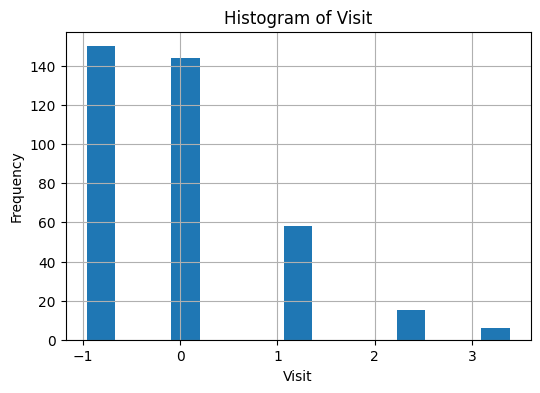

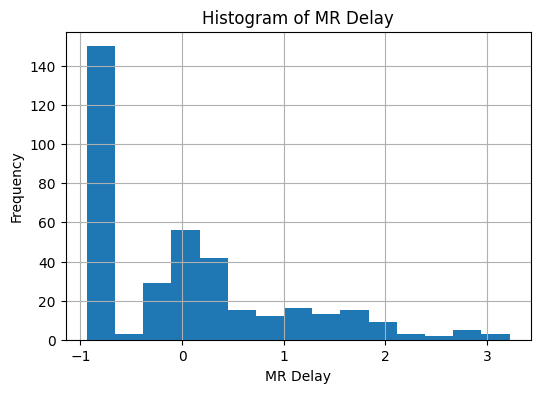

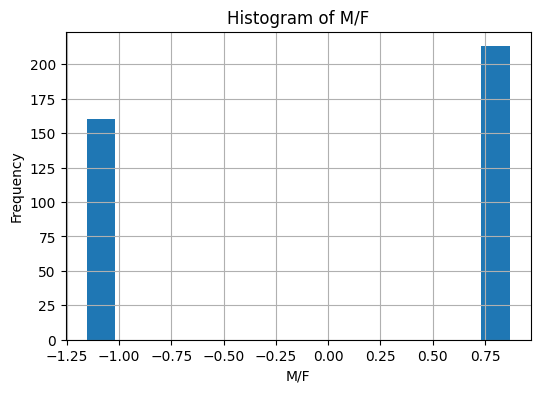

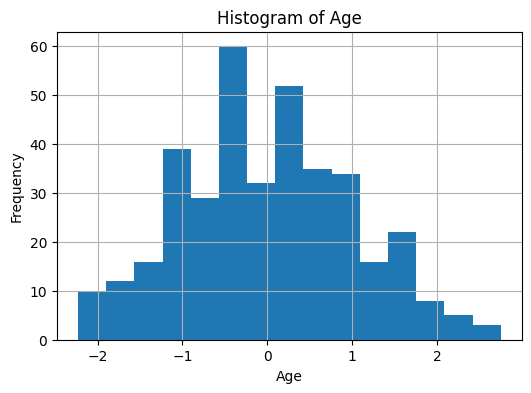

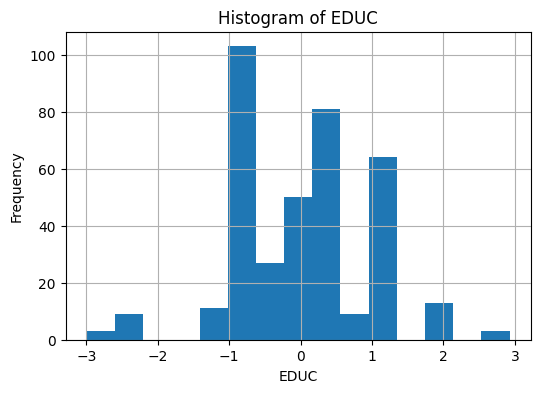

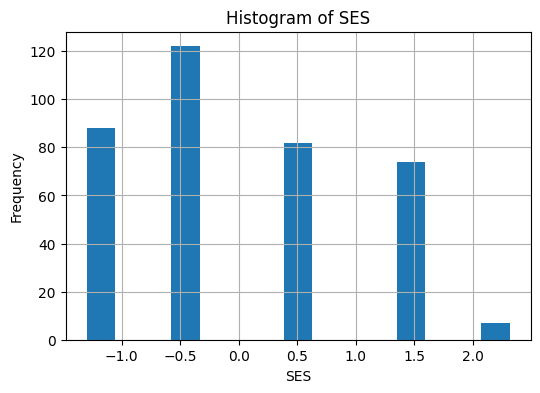

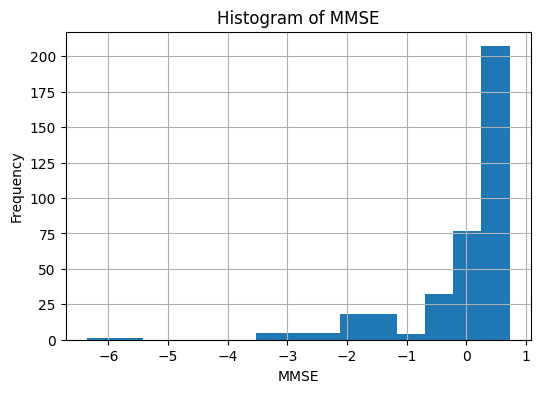

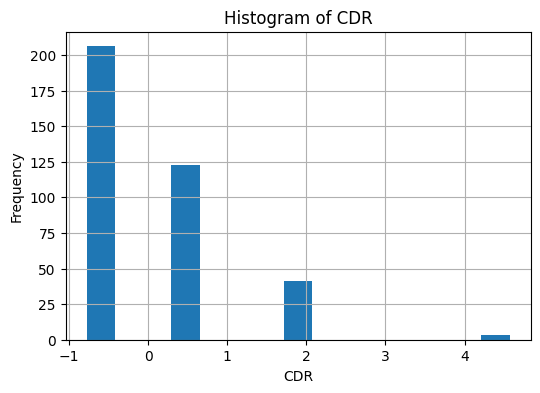

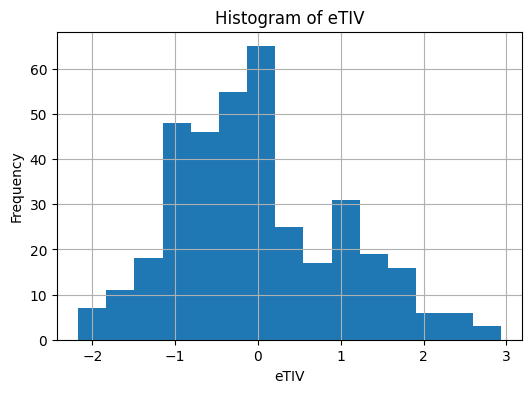

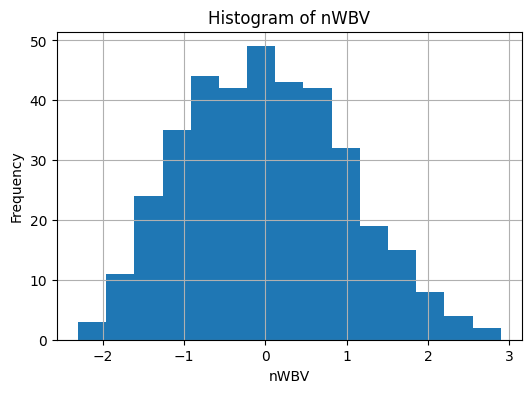

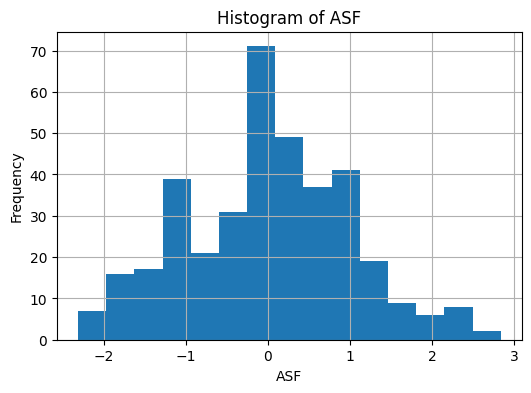

In [22]:
# Histograms for numerical features
num_cols = cleaned.select_dtypes(include=['number']).columns

# Creating a separate histogram for each numerical feature
for col in num_cols:
    plt.figure()  # This ensures a new figure is created for each histogram
    cleaned[col].hist(bins=15, figsize=(6, 4))
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

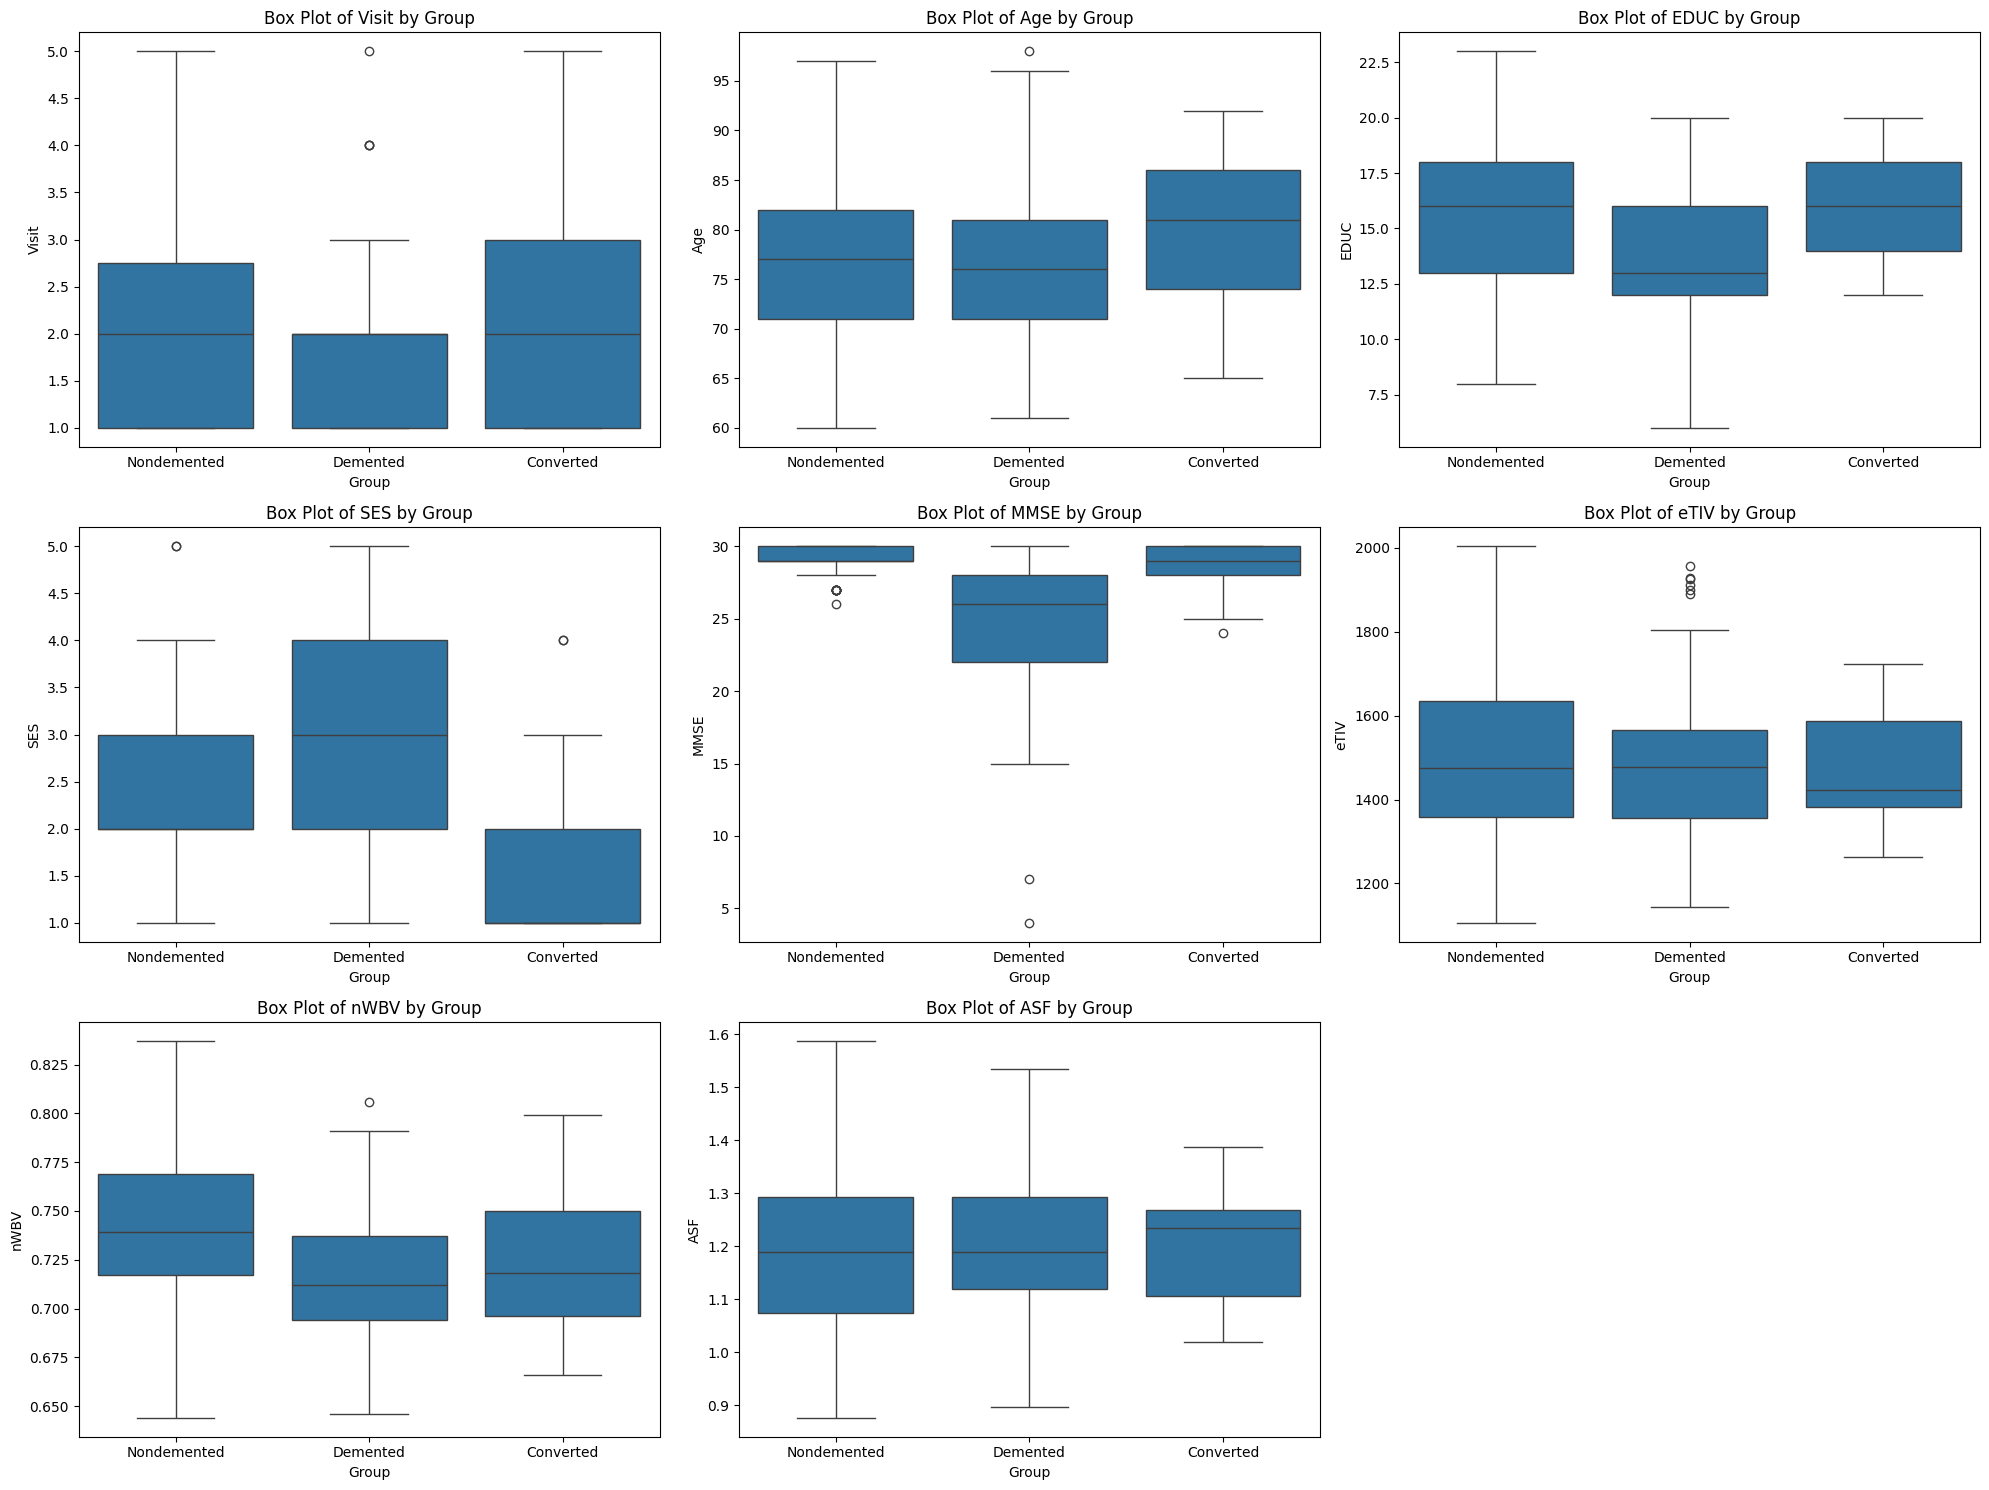

In [8]:
numerical_cols = cleaned.select_dtypes(include=['number']).columns
# Exclude 'Group' as it's not numerical
excluded_cols = ['MR Delay', 'CDR', 'Group']

# Filter out the excluded columns
numerical_cols = [col for col in numerical_cols if col not in excluded_cols]

# Set up the figure for plotting
# Number of plots per row
num_cols_in_row = 3

# Calculate the number of rows needed
num_rows = -(-len(numerical_cols) // num_cols_in_row)
plt.figure(figsize=(20, num_rows * 5))

# Create a box plot for each numerical column
# Initialize subplot position
plot_position = 1
for col in numerical_cols:
    plt.subplot(num_rows, num_cols_in_row, plot_position)
    sns.boxplot(x='Group', y=col, data=cleaned)
    plt.title(f'Box Plot of {col} by Group')
    # Increment subplot position
    plot_position += 1

plt.tight_layout()
plt.show()

**Visit by Group**: The distribution for Group 0 has a median closer to 2, while Group 1 has a median that is slightly higher, suggesting Group 1 may have had more visits or a different kind of engagement with the healthcare process.

**MF by Group**: It seems to show a categorical variable (possibly Male/Female or another binary categorical variable) which does not vary by group, indicating similar distribution across both groups.

**Age by Group**: Group 0 has a wider age range with more variability and younger median age, while Group 1 has a higher median age with less variability, implying that Group 1 might consist of older individuals.

**EDUC by Group**: Education level (if EDUC stands for education) has a wider range and higher median for Group 0 compared to Group 1, suggesting that individuals in Group 0 may have higher education levels on average.

**SES by Group**: Socioeconomic status (if SES stands for that) shows a wider range for Group 0 but similar median values for both groups. Group 1 has an outlier indicating an individual with a very low SES.

**MMSE by Group**: The Mini-Mental State Examination (MMSE) scores are lower for Group 1, as indicated by the lower median and overall range, which could suggest greater cognitive impairment in this group.

**eTIV by Group**: Estimated Total Intracranial Volume (eTIV) shows a slightly higher median for Group 0 and more outliers in Group 1, indicating variability in brain size or health.

**nWBV by Group**: Normalized Whole Brain Volume (nWBV) is lower for Group 1, as seen by the lower median and quartiles, possibly suggesting more brain volume loss or atrophy in Group 1.

**ASF by Group**: The Atlas Scaling Factor (ASF) has a higher median for Group 1, which could correlate with brain atrophy or size differences compared to Group 0.

In [3]:
#Analysing the dataset
#converted is turned as demented
cleaned['Group'] = cleaned['Group'].replace(['Converted'], ['Demented'])
# Converting the catagorical values in numerical
cleaned['M/F'] = cleaned['M/F'].replace(['M','F'], [0,1])
cleaned['Group'] = cleaned['Group'].replace(['Nondemented', 'Demented'], [1,0])
display(cleaned.head())

C:\Users\asus\AppData\Local\Temp\ipykernel_24452\3916720633.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned['M/F'] = cleaned['M/F'].replace(['M','F'], [0,1])
C:\Users\asus\AppData\Local\Temp\ipykernel_24452\3916720633.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cleaned['Group'] = cleaned['Group'].replace(['Nondemented', 'Demented'], [1,0])


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,1,1,0,0,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,1,2,457,0,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,0,1,0,0,R,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,0,2,560,0,R,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,0,3,1895,0,R,80,12,2.0,22.0,0.5,1698,0.701,1.034


Training Data Evaluation
Training Model Accuracy: 0.9832214765100671
Confusion Matrix on Training Data:
[[137   3]
 [  2 156]]
Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       140
           1       0.98      0.99      0.98       158

    accuracy                           0.98       298
   macro avg       0.98      0.98      0.98       298
weighted avg       0.98      0.98      0.98       298

Final Model Accuracy: 0.88
Confusion Matrix:
[[37  6]
 [ 3 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        43
           1       0.83      0.91      0.87        32

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



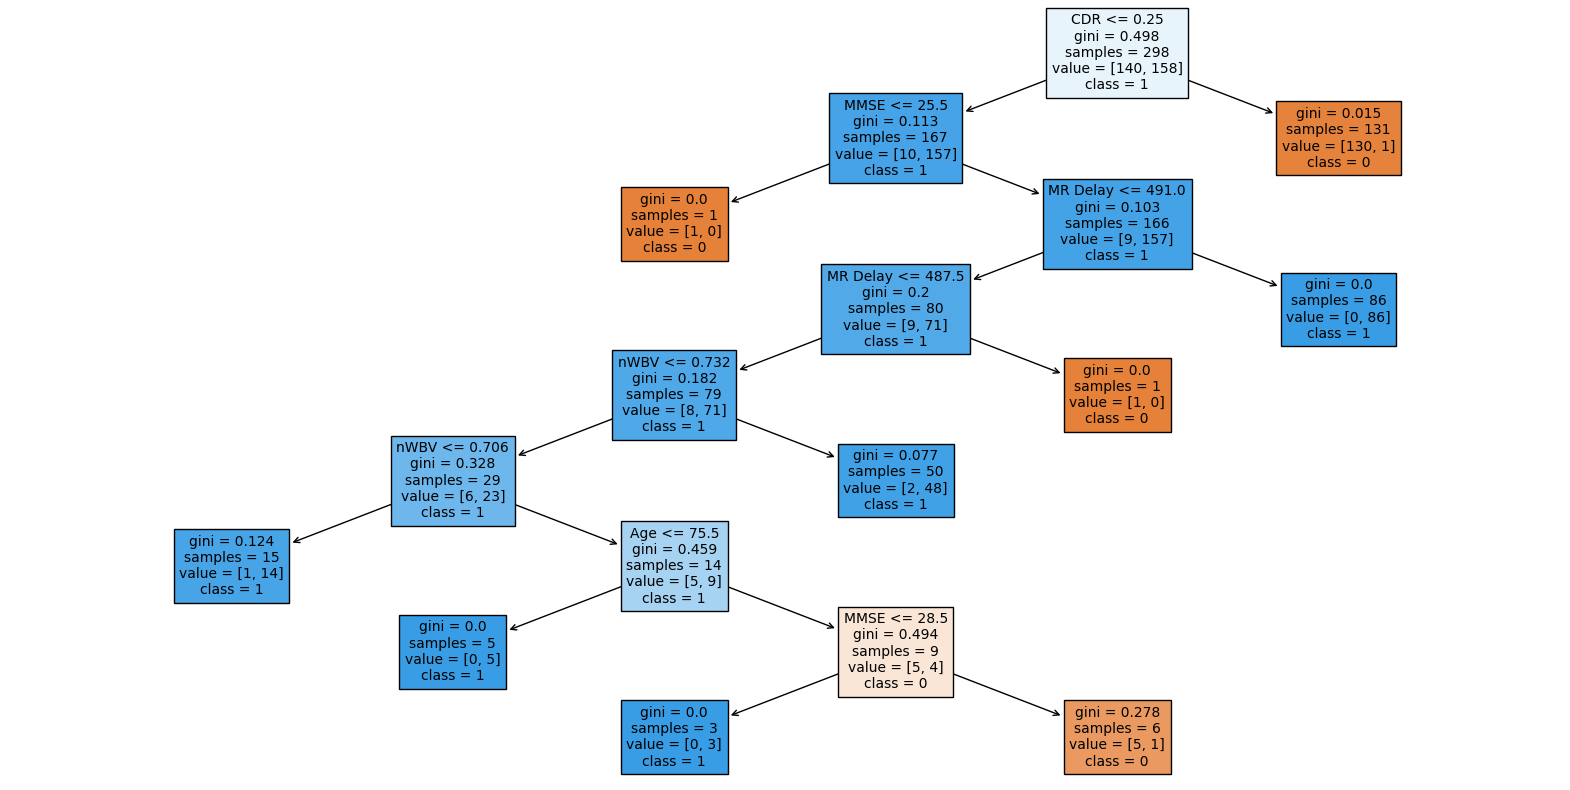

In [4]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'cleaned' is your preprocessed DataFrame
cleaned['Group'] = cleaned['Group'].astype('category')
Y = cleaned['Group']
X = cleaned.drop(['Group', 'Subject ID', 'MRI ID', 'Hand','Visit'], axis=1)

# Splitting the dataset into training and testing sets (for final evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize K-Fold for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List to store the optimal ccp_alpha values from each fold
opt_cp = []

for train_index, val_index in kf.split(X_train):
    X_train_k, X_val_k = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_k, y_val_k = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Train the Decision Tree model on the training split
    tree_model = DecisionTreeClassifier(random_state=42)
    tree_model.fit(X_train_k, y_train_k)
    
    # Evaluate the model on the validation split
    y_pred_val = tree_model.predict(X_val_k)
    accuracy_val = accuracy_score(y_val_k, y_pred_val)
    
    # Get the best ccp_alpha value that minimizes cross-validation error
    path = tree_model.cost_complexity_pruning_path(X_train_k, y_train_k)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities
    tree_models = [DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha).fit(X_train_k, y_train_k) for ccp_alpha in ccp_alphas]
    accuracies = [accuracy_score(y_val_k, model.predict(X_val_k)) for model in tree_models]
    best_ccp_alpha = ccp_alphas[np.argmax(accuracies)]
    opt_cp.append(best_ccp_alpha)

# Average the optimal ccp_alpha values and train a new model on the full training set
average_ccp_alpha = np.mean(opt_cp)
final_tree_model = DecisionTreeClassifier(random_state=42, ccp_alpha=average_ccp_alpha)
final_tree_model.fit(X_train, y_train)

# Predict on the test set and evaluate
y_pred_test = final_tree_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)

y_pred_train = final_tree_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
classification_rep_train = classification_report(y_train, y_pred_train)

print("Training Data Evaluation")
print(f"Training Model Accuracy: {accuracy_train}")
print("Confusion Matrix on Training Data:")
print(conf_matrix_train)
print("Classification Report on Training Data:")
print(classification_rep_train)

print(f"Final Model Accuracy: {accuracy_test}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

# Plotting the decision tree
plt.figure(figsize=(20,10))
plot_tree(final_tree_model, filled=True, feature_names=X.columns, class_names=np.unique(y_train).astype(str), fontsize=10)
plt.show()


If "CDR <= 0.25", the model looks next at "MMSE".

If "CDR > 0.25", it predicts class 0 (with a very low Gini, meaning it's quite certain).

For samples where "CDR <= 0.25", if "MMSE <= 25.5", it predicts class 1; if "MMSE > 25.5", it predicts class 1, but there's one sample that would be predicted as class 0 (with "MMSE <= 25.5").

 the Gini index, sample size, and value distribution help determine the quality and confidence of the predictions at each node. A perfectly pure node (Gini index = 0) means all samples at that node belong to the same class.

Final Random Forest Model Accuracy: 0.8933333333333333
Confusion Matrix:
[[36  7]
 [ 1 31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90        43
           1       0.82      0.97      0.89        32

    accuracy                           0.89        75
   macro avg       0.89      0.90      0.89        75
weighted avg       0.91      0.89      0.89        75



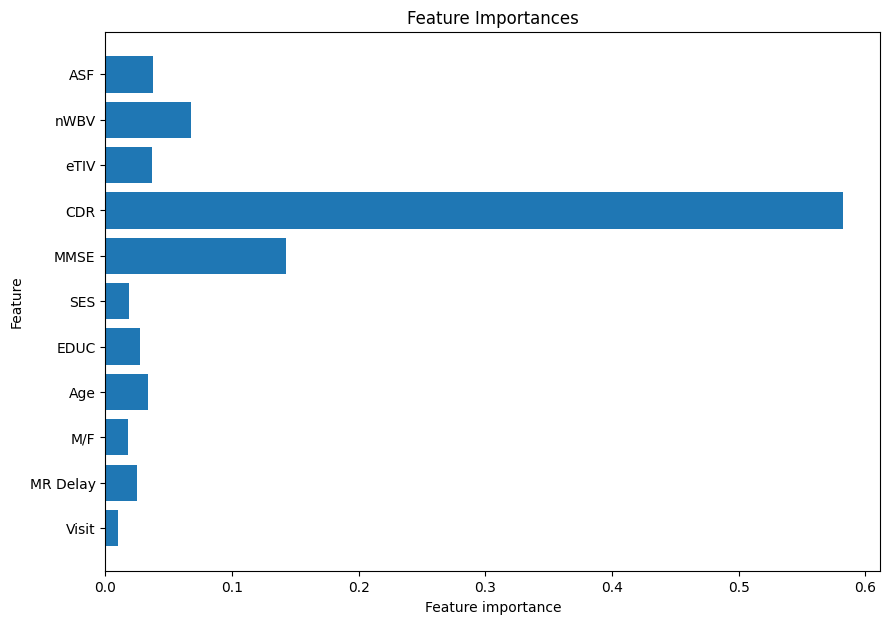

In [16]:
from sklearn.ensemble import RandomForestClassifier
cleaned['Group'] = cleaned['Group'].astype('category')
Y = cleaned['Group']
X = cleaned.drop(['Group', 'Subject ID', 'MRI ID', 'Hand'], axis=1)

# Splitting the dataset into training and testing sets (for final evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize K-Fold for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List to store the best scores from each fold
best_scores = []

# Initialize an empty list to collect feature importances
feature_importances = np.zeros(X_train.shape[1])

for train_index, val_index in kf.split(X_train):
    # Split data
    X_train_k, X_val_k = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_k, y_val_k = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
    
    # Fit the model
    rf_model.fit(X_train_k, y_train_k)
    
    # Evaluate the model
    y_pred_val = rf_model.predict(X_val_k)
    accuracy_val = accuracy_score(y_val_k, y_pred_val)
    best_scores.append(accuracy_val)
    
    # Aggregate the feature importances
    feature_importances += rf_model.feature_importances_

# Average feature importances
feature_importances /= kf.get_n_splits()

# Train a final Random Forest model on the entire training set
final_rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
final_rf_model.fit(X_train, y_train)

# Predict on the test set and evaluate
y_pred_test = final_rf_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)

print(f"Final Random Forest Model Accuracy: {accuracy_test}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

# Feature importances can give insight on how each feature contributes to the model
plt.figure(figsize=(10, 7))
plt.title("Feature Importances")
plt.barh(range(X_train.shape[1]), feature_importances, align='center')
plt.yticks(np.arange(X_train.shape[1]), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()


Final Model Accuracy: 0.88
Confusion Matrix:
 [[35  8]
 [ 1 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.81      0.89        43
           1       0.79      0.97      0.87        32

    accuracy                           0.88        75
   macro avg       0.88      0.89      0.88        75
weighted avg       0.90      0.88      0.88        75



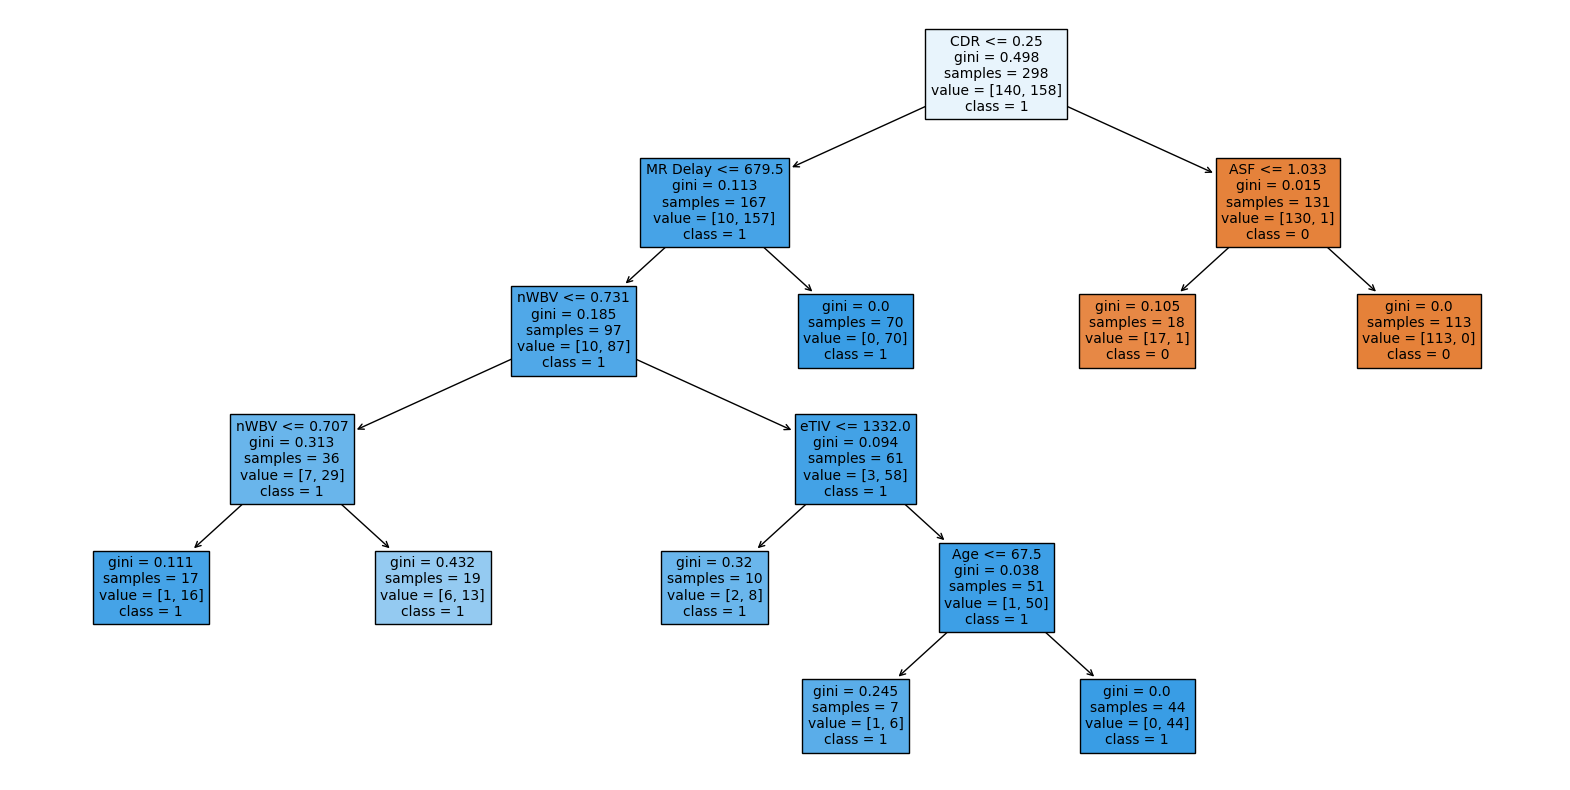

In [17]:
"""
param_grid = {
    'max_depth': [10,30,50],
    'criterion':['gini','entropy'],
    'max_features' : ('auto','sqrt','log2'),
    'min_samples_split' :(2,4,6),   
    'ccp_alpha': [0.0, 0.005, 0.01, 0.015, 0.02] 
}
"""
"""
param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 20],   
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],     
    'ccp_alpha': [0.0, 0.005, 0.01, 0.015, 0.02] 
}
"""

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'ccp_alpha': [0.0, 0.01, 0.1]
}
# Grid search with cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model from grid search
best_tree_model = grid_search.best_estimator_

# Predict on the test set with the best model
y_pred_test = best_tree_model.predict(X_test)
print("Final Model Accuracy:", accuracy_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("Classification Report:\n", classification_report(y_test, y_pred_test))

# Plotting the decision tree
plt.figure(figsize=(20,10))
plot_tree(best_tree_model, filled=True, feature_names=X.columns, class_names=np.unique(y_train).astype(str), fontsize=10)
plt.show()


Best Grid Search Random Forest Model Accuracy: 0.9066666666666666
Confusion Matrix:
[[37  6]
 [ 1 31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        43
           1       0.84      0.97      0.90        32

    accuracy                           0.91        75
   macro avg       0.91      0.91      0.91        75
weighted avg       0.92      0.91      0.91        75



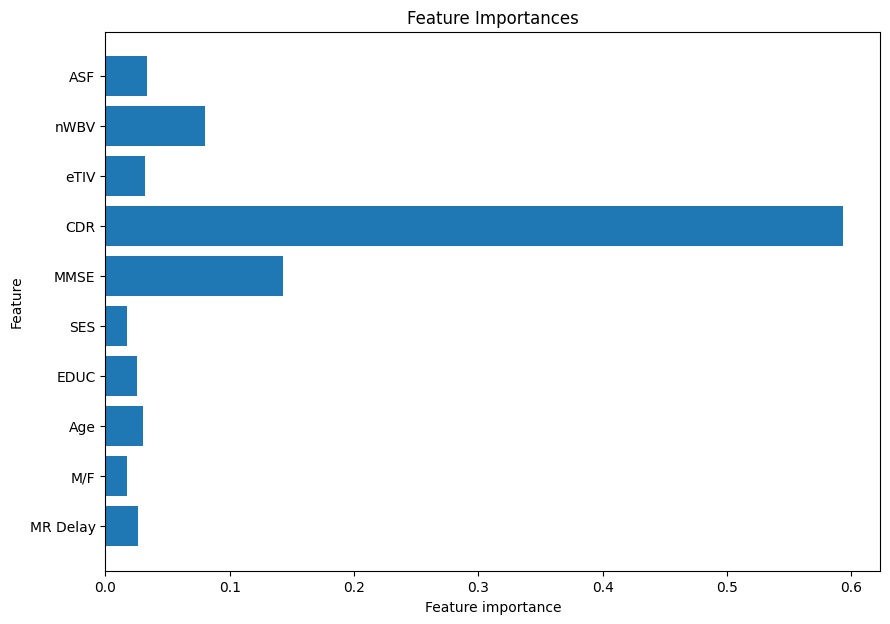

In [7]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

cleaned['Group'] = cleaned['Group'].astype('category')
Y = cleaned['Group']
X = cleaned.drop(['Group', 'Subject ID', 'MRI ID', 'Hand', 'Visit'], axis=1)

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back into a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Splitting the scaled dataset into training and testing sets (for final evaluation)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Grid search with cross-validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=3)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_rf_model = grid_search.best_estimator_

# Predict on the test set with the best model
y_pred_test = best_rf_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)

print(f"Best Grid Search Random Forest Model Accuracy: {accuracy_test}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

# Feature importances from the best model
feature_importances = best_rf_model.feature_importances_
plt.figure(figsize=(10, 7))
plt.title("Feature Importances")
plt.barh(range(X_train.shape[1]), feature_importances, align='center')
plt.yticks(np.arange(X_train.shape[1]), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()


c:\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Grid Search Parameters: {'learning_rate': 0.01, 'n_estimators': 10}
Test Accuracy: 0.88
Test Recall: 0.96875
Test AUC: 0.8913517441860466


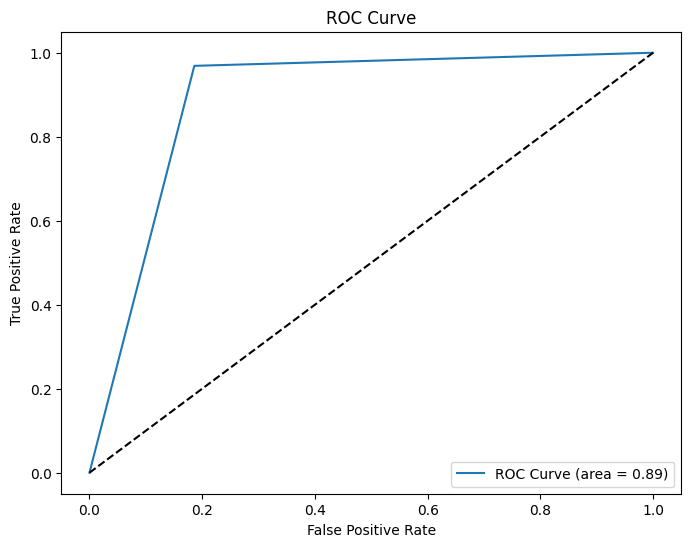

In [15]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt

# Splitting the dataset into training/validation and testing sets
X_trainval, X_test, Y_trainval, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Initialize AdaBoostClassifier with the default base estimator
ada_boost = AdaBoostClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(ada_boost, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_trainval, Y_trainval)

# Best model from GridSearchCV
best_ada_model = grid_search.best_estimator_

# Predict on the test set and evaluate
y_pred_test = best_ada_model.predict(X_test)
test_score = accuracy_score(Y_test, y_pred_test)
test_recall = recall_score(Y_test, y_pred_test)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_test)
test_auc = auc(fpr, tpr)

# Print best model results
print("Best Grid Search Parameters:", grid_search.best_params_)
print("Test Accuracy:", test_score)
print("Test Recall:", test_recall)
print("Test AUC:", test_auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % test_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


ADA BOOST

Area Under the Curve (AUC): The AUC is 0.89, which is quite close to 1. This indicates a very good level of separability. The model is able to distinguish between the two classes (positive and negative classes) with a high degree of accuracy.

True Positive Rate: The TPR starts at 0, quickly increases to approximately 0.8 for a very low FPR, and then it plateaus. This rapid increase and high plateau suggest that the model can correctly identify a high proportion of actual positives while maintaining a low false positive rate.

False Positive Rate: The FPR is very low for a substantial portion of the curve, which suggests that the model has a low rate of falsely classifying negative instances as positive.

Model Performance: The curve stays far away from the diagonal dotted line (which represents a random classifier), the model has a strong predictive power. A random classifier would have an AUC of 0.5, and this model is significantly above that, indicating good performance.

Optimal Threshold: The 'elbow' of the ROC curve represents an optimal balance between sensitivity (TPR) and specificity (1 - FPR). we can choose a threshold that maximizes TPR while minimizing FPR, which is usually around this elbow.